## <font color = 'purple'>Notebook 4: Data Pre-processing and Exploratory Data Analysis (EDA)</font>

## <font color = 'purple'>Import packages</font>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving main_dataset.xlsx to main_dataset.xlsx


In [2]:
# Libraries for data processing
import numpy as np
import pandas as pd

# Libraries for text processing and NLP
import nltk
from textblob import TextBlob

# Gensim library for topic modelling and text vectorisation
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# Libraries for data visualisation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

# Miscellaneous imports
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
#pip install --upgrade numexpr bottleneck

In [4]:
# Verifying installation of dependencies
import numexpr
import bottleneck

print("NumExpr version:", numexpr.__version__)
print("Bottleneck version:", bottleneck.__version__)

NumExpr version: 2.10.1
Bottleneck version: 1.4.0


## <font color = 'purple'>Load data</font>
<font color = 'purple'>Note: Due to a TrueType fonts error appearing during WordCloud process, which occurred due to the combined_reviews.csv file containing a different font, this had to be changed to Arial for the error to be diminished.</font>

In [5]:
df = pd.read_excel('main_dataset.xlsx')

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

df.head()

Shape of the dataset: (44855, 4)
Columns in the dataset: Index(['date', 'review', 'rating', 'userName'], dtype='object')


,date,review,rating,userName
0,2021-05-06 05:15:00.000,This feature has been one of the most annoying...,5,Keanu De Sousa
1,2024-02-01 09:06:59.904,"The privacy on WhatsApp is incredible, I know ...",4,The great idea!!!
2,2023-08-14 05:42:00.000,"Hi WhatsApp,\nThis app is really great, I use ...",4,Pokey Ball ‚öæÔ∏è
3,2024-08-04 15:53:00.384,If there was ever an equivalent of social serv...,1,Zenicero
4,2024-05-26 01:12:59.616,Im on holiday and reliant on whatsapp to commu...,1,JohnDoe63737286


In [6]:
#pip install --upgrade openpyxl

In [7]:
import openpyxl
print(openpyxl.__version__)

3.1.5


### <font color = 'purple'>Data Pre-processing</font>

<font color = 'purple'>
The below code defines a `preprocess_text` function to clean and standardise text by converting it to lowercase, removing punctuation, digits, and extra spaces. It applies this function to the 'content' column of a DataFrame, creating a new column `content_cleaned` with the processed text.
</font>

In [8]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Split text into words and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Apply the updated preprocess_text function to your dataset
df['content_cleaned'] = df['review'].apply(preprocess_text)

# Display the first few rows of the cleaned content
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,date,review,rating,userName,content_cleaned
0,2021-05-06 05:15:00.000,This feature has been one of the most annoying...,5,Keanu De Sousa,feature one annoying aspects whatsapp everytim...
1,2024-02-01 09:06:59.904,"The privacy on WhatsApp is incredible, I know ...",4,The great idea!!!,privacy whatsapp incredible know probably donä...
2,2023-08-14 05:42:00.000,"Hi WhatsApp,\nThis app is really great, I use ...",4,Pokey Ball ‚öæÔ∏è,hi whatsapp app really great use everyday exac...
3,2024-08-04 15:53:00.384,If there was ever an equivalent of social serv...,1,Zenicero,ever equivalent social services took words awa...
4,2024-05-26 01:12:59.616,Im on holiday and reliant on whatsapp to commu...,1,JohnDoe63737286,im holiday reliant whatsapp communicate agents...


In [9]:
df.isnull()
total_null_values = df.isnull().sum().sum()
print("Total null values in the DataFrame: ", total_null_values)

Total null values in the DataFrame:  12


In [10]:
df.fillna('', inplace = True)

In [11]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)

In [12]:
df = df[['content_cleaned', 'review', 'rating', 'date']]
df.head()

,content_cleaned,review,rating,date
0,feature one annoying aspects whatsapp everytim...,This feature has been one of the most annoying...,5,2021-05-06 05:15:00.000
1,privacy whatsapp incredible know probably donä...,"The privacy on WhatsApp is incredible, I know ...",4,2024-02-01 09:06:59.904
2,hi whatsapp app really great use everyday exac...,"Hi WhatsApp,\nThis app is really great, I use ...",4,2023-08-14 05:42:00.000
3,ever equivalent social services took words awa...,If there was ever an equivalent of social serv...,1,2024-08-04 15:53:00.384
4,im holiday reliant whatsapp communicate agents...,Im on holiday and reliant on whatsapp to commu...,1,2024-05-26 01:12:59.616


### <font color = 'purple'>Exploratory Data Analysis (EDA)</font>

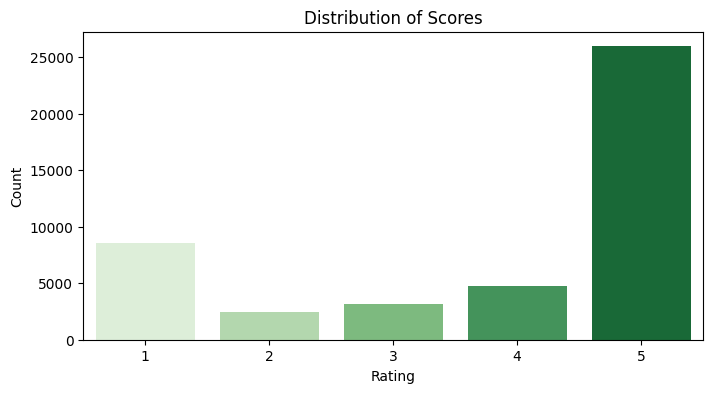

In [13]:
score_counts = df.rating.value_counts().sort_index()

plt.figure(figsize=(8, 4))

sns.barplot(x=score_counts.index, y=score_counts.values, palette=sns.color_palette("Greens", n_colors=5))

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [14]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [15]:
df['sentiment'] = df['content_cleaned'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else
                                             ('negative' if x <- 0.1 else 'neutral'))

In [16]:
df[['content_cleaned', 'rating', 'sentiment_label']]

,content_cleaned,rating,sentiment_label
0,feature one annoying aspects whatsapp everytim...,5,negative
1,privacy whatsapp incredible know probably donä...,4,positive
2,hi whatsapp app really great use everyday exac...,4,positive
3,ever equivalent social services took words awa...,1,positive
4,im holiday reliant whatsapp communicate agents...,1,negative
...,...,...,...
44850,free delivery prime,5,positive
44851,would expectamazon trying get hand pocket,3,neutral
44852,registry system mess sorting price low high wa...,2,neutral
44853,clothes furniture options kinda meh overall de...,3,neutral


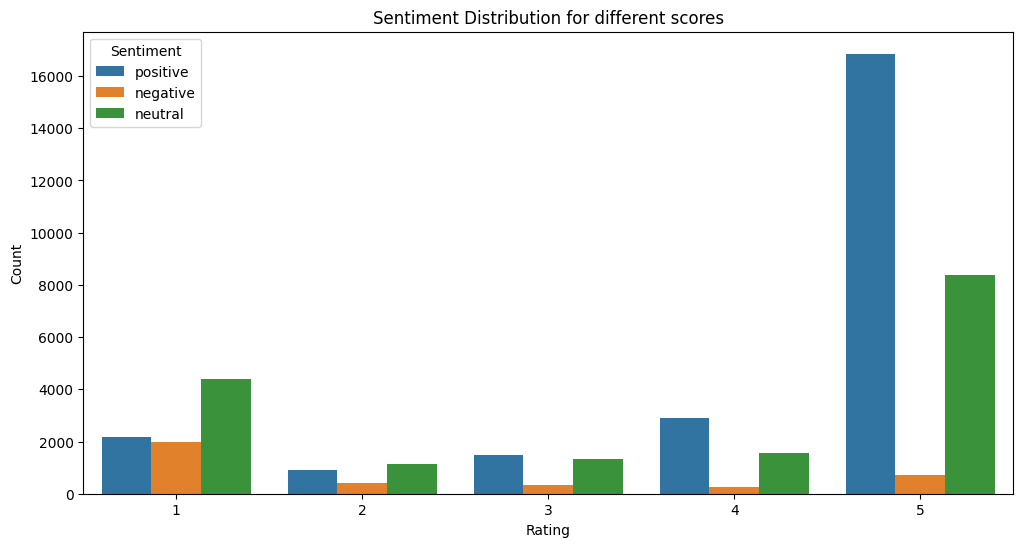

In [17]:
# Sentiment distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x = 'rating', hue = 'sentiment_label')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Sentiment Distribution for different scores')
plt.legend(title='Sentiment')
plt.show()

In [18]:
# Descriptive statistics for numerical columns
df.describe()

,rating,date,sentiment
count,44855.000000,44855,44855.000000
mean,3.829071,2023-08-06 03:51:06.911935744,0.260470
min,1.000000,2013-08-16 14:39:59.904000,-1.000000
25%,3.000000,2023-11-26 16:04:29.856000,0.000000
50%,5.000000,2024-07-06 07:50:00.096000,0.187500
75%,5.000000,2024-07-09 20:35:00.096000,0.600000
max,5.000000,2024-09-20 04:36:00.288000,1.000000
std,1.596850,NaN,0.368277


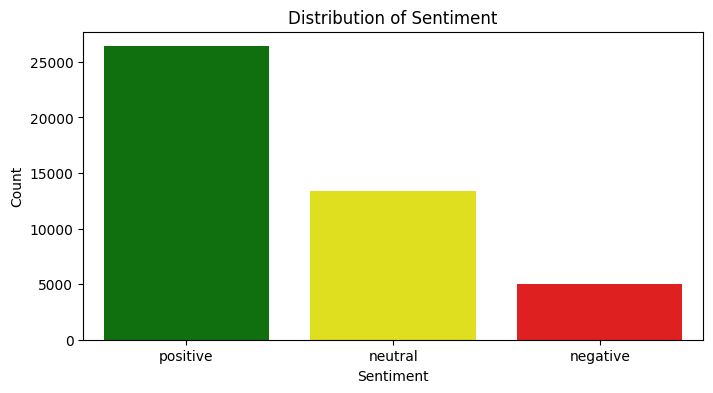

In [19]:
# Assign sentiment polarity to reviews
df['polarity'] = df['content_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create sentiment category based on polarity
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Plotting sentiment distribution with custom colors
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 4))

# Define custom color palette for positive, neutral, and negative sentiments
colors = ['green' if sentiment == 'positive' else 'yellow' if sentiment == 'neutral' else 'red' for sentiment in sentiment_counts.index]

# Plot with custom colors
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

In [20]:
#pip install --upgrade pillow

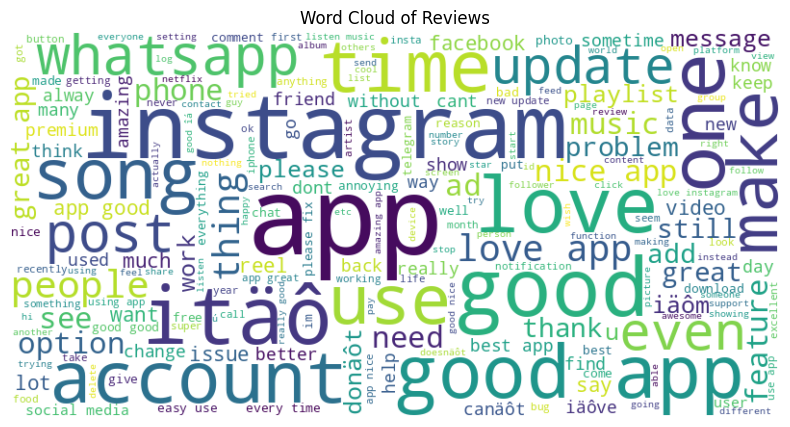

In [22]:
# Combine all reviews into one large text for the word cloud
all_words = ' '.join([text for text in df['content_cleaned']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, colormap='viridis').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

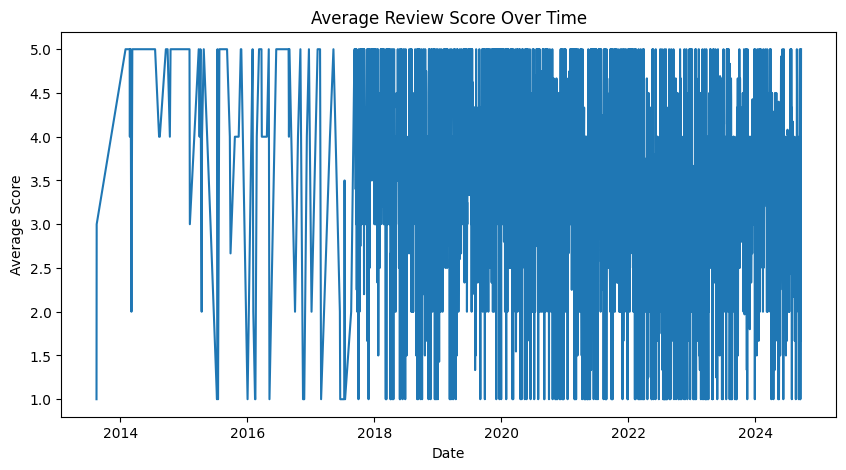

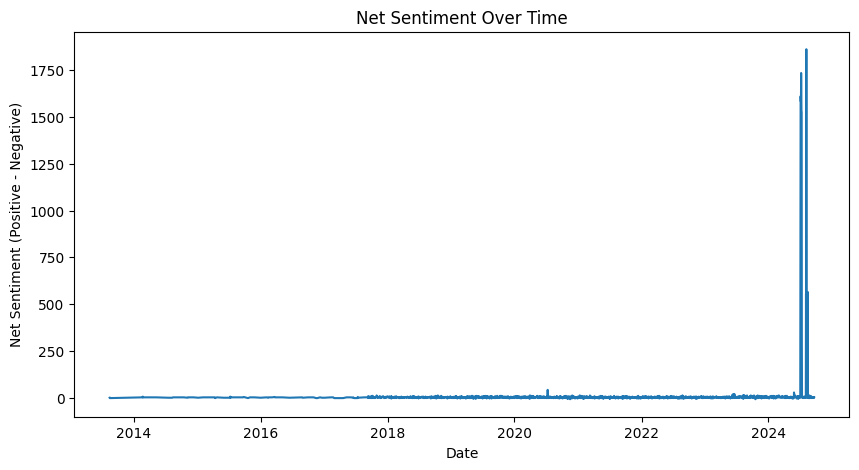

In [23]:
# Group by date and calculate mean score
df['date'] = df['date'].dt.date
daily_scores = df.groupby('date')['rating'].mean()

# Plotting score trends over time
plt.figure(figsize=(10, 5))
daily_scores.plot()
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.title('Average Review Score Over Time')
plt.show()

# Sentiment over time
daily_sentiment = df.groupby('date')['sentiment'].apply(lambda x: x.value_counts().get('positive', 0) - x.value_counts().get('negative', 0))

plt.figure(figsize=(10, 5))
daily_sentiment.plot()
plt.xlabel('Date')
plt.ylabel('Net Sentiment (Positive - Negative)')
plt.title('Net Sentiment Over Time')
plt.show()

In [24]:
from collections import Counter

# Function to get top n words in reviews
def get_top_n_words(corpus, n=10):
    words = ' '.join(corpus).split()
    return Counter(words).most_common(n)

# Top 10 words in positive reviews
top_positive_words = get_top_n_words(df[df['sentiment'] == 'positive']['content_cleaned'], 10)
print("Top 10 words in positive reviews:", top_positive_words)

# Top 10 words in negative reviews
top_negative_words = get_top_n_words(df[df['sentiment'] == 'negative']['content_cleaned'], 10)
print("Top 10 words in negative reviews:", top_negative_words)

# Top 10 words in neutral reviews
top_neutral_words = get_top_n_words(df[df['sentiment'] == 'neutral']['content_cleaned'], 10)
print("Top 10 words in neutral reviews:", top_neutral_words)

Top 10 words in positive reviews: [('app', 10885), ('good', 6710), ('nice', 3450), ('love', 3262), ('great', 2488), ('like', 2170), ('instagram', 2013), ('best', 1994), ('use', 1831), ('itäôs', 1784)]
Top 10 words in negative reviews: [('app', 2453), ('itäôs', 736), ('time', 636), ('instagram', 589), ('account', 575), ('like', 565), ('bad', 565), ('annoying', 557), ('get', 532), ('use', 516)]
Top 10 words in neutral reviews: [('app', 1939), ('instagram', 801), ('please', 675), ('like', 609), ('hai', 578), ('account', 445), ('whatsapp', 374), ('cant', 355), ('time', 323), ('dont', 293)]


[('app', 15277), ('good', 6833), ('nice', 3466), ('love', 3419), ('instagram', 3403), ('like', 3344), ('use', 2640), ('itäôs', 2630), ('great', 2572), ('songs', 2413), ('music', 2223), ('time', 2201), ('get', 2033), ('best', 2007), ('please', 1978), ('one', 1962), ('account', 1951), ('song', 1922), ('would', 1792), ('really', 1779)]


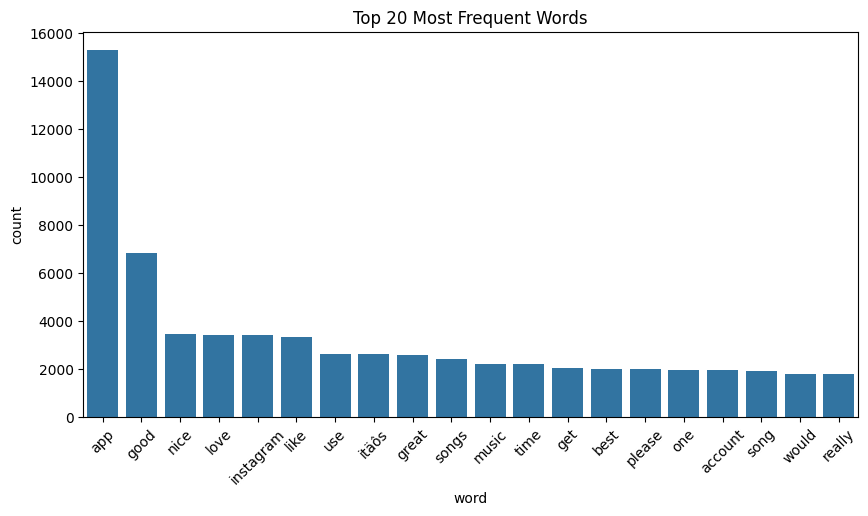

In [26]:
from collections import Counter

# Combine all cleaned reviews into a single text
all_words = ' '.join(df['content_cleaned'])

# Split into individual words
words = all_words.split()

# Count word frequencies
word_freq = Counter(words)

# Display the most common words
most_common_words = word_freq.most_common(20)
print(most_common_words)

# Plot the most common words
word_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_df)
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.show()

In [27]:
from nltk import ngrams

# Function to generate n-grams
def get_ngrams(text, n):
    tokens = text.split()
    return list(ngrams(tokens, n))

# Apply to the cleaned content
bigrams = df['content_cleaned'].apply(lambda x: get_ngrams(x, 2))
trigrams = df['content_cleaned'].apply(lambda x: get_ngrams(x, 3))

# Flatten and count frequencies
all_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_freq = Counter(all_bigrams).most_common(20)

all_trigrams = [trigram for sublist in trigrams for trigram in sublist]
trigram_freq = Counter(all_trigrams).most_common(20)

# Display results
print("Top 20 Bigrams:", bigram_freq)
print("Top 20 Trigrams:", trigram_freq)

Top 20 Bigrams: [(('good', 'app'), 1061), (('love', 'app'), 877), (('nice', 'app'), 813), (('great', 'app'), 746), (('best', 'app'), 588), (('social', 'media'), 453), (('every', 'time'), 448), (('easy', 'use'), 407), (('please', 'fix'), 398), (('using', 'app'), 353), (('new', 'update'), 332), (('use', 'app'), 313), (('love', 'instagram'), 304), (('app', 'good'), 286), (('app', 'great'), 282), (('amazing', 'app'), 256), (('listen', 'music'), 245), (('good', 'îá'), 237), (('really', 'good'), 235), (('like', 'app'), 207)]
Top 20 Trigrams: [(('social', 'media', 'app'), 125), (('every', 'time', 'try'), 78), (('best', 'social', 'media'), 77), (('itäôs', 'great', 'app'), 72), (('best', 'app', 'ever'), 69), (('app', 'easy', 'use'), 66), (('social', 'media', 'platform'), 66), (('really', 'good', 'app'), 60), (('every', 'time', 'open'), 58), (('love', 'app', 'much'), 56), (('ek', 'bhi', 'ladki'), 54), (('using', 'app', 'years'), 51), (('iäôve', 'using', 'app'), 50), (('bhi', 'ladki', 'reply'), 4

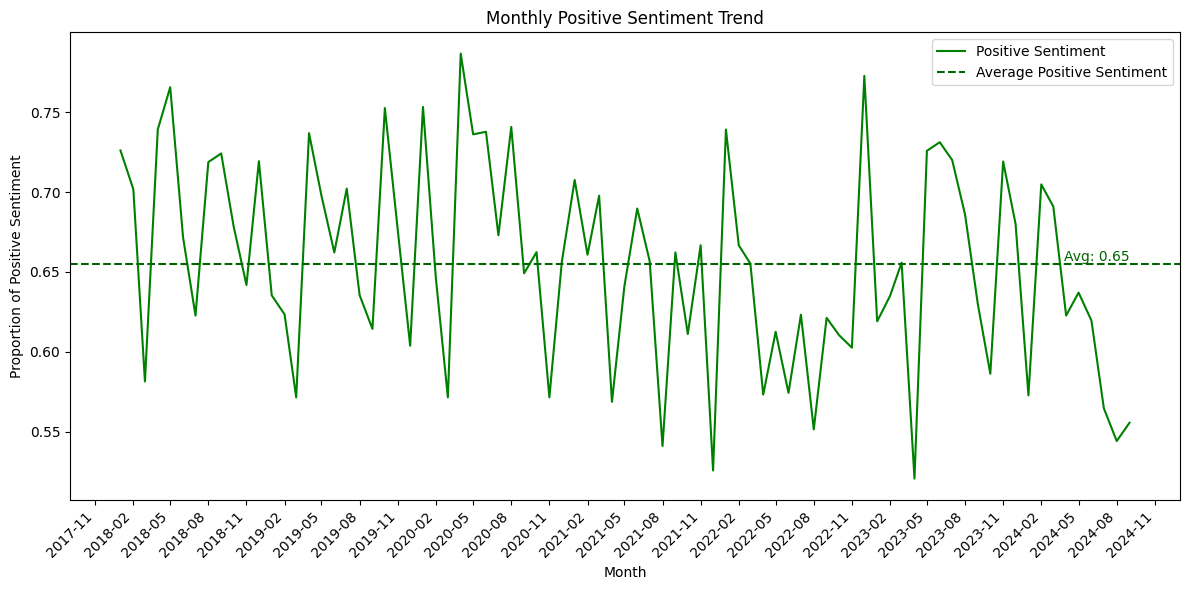

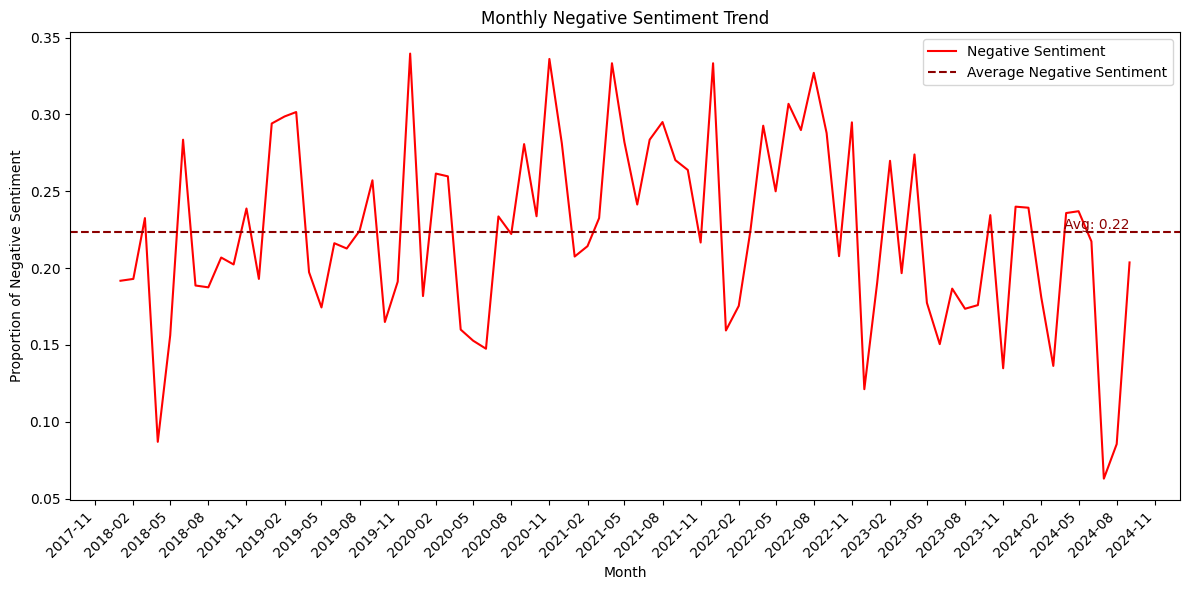

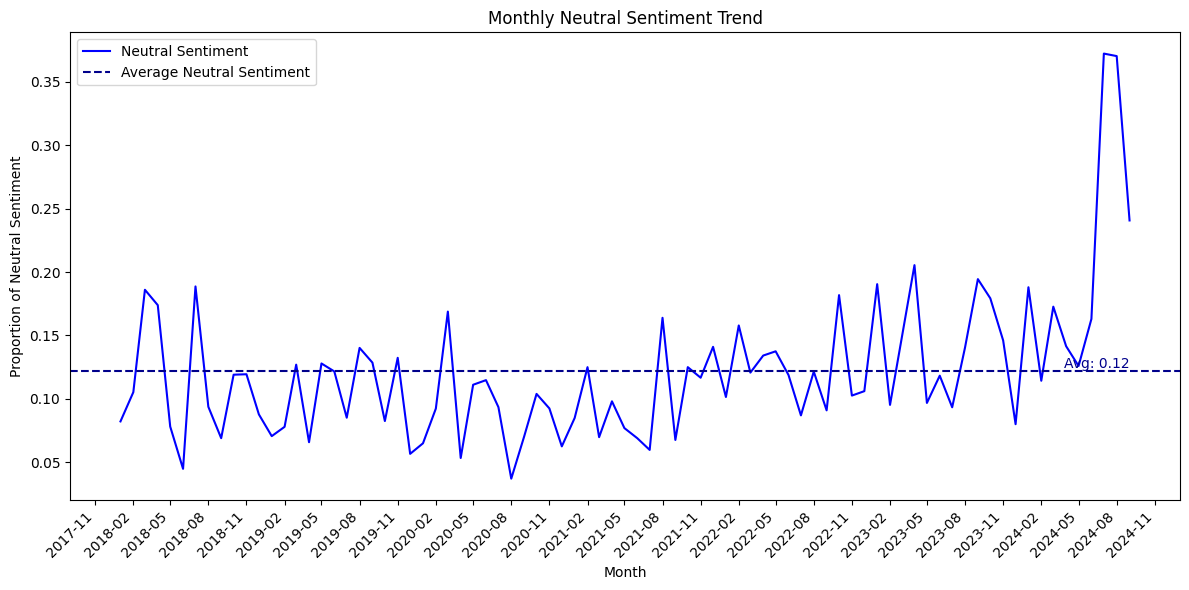

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Create a 'month' column with datetime objects for monthly sentiment analysis
df['month'] = pd.to_datetime(df['date']).dt.to_period('M').dt.to_timestamp()

# Filter the DataFrame to only include data from 2018 onwards
df_filtered = df[df['month'] >= '2018-01-01']

# Group by month and calculate the mean sentiment for each category
monthly_positive_sentiment = df_filtered.groupby('month')['sentiment'].apply(
    lambda x: x.value_counts(normalize=True).get('positive', 0))
monthly_negative_sentiment = df_filtered.groupby('month')['sentiment'].apply(
    lambda x: x.value_counts(normalize=True).get('negative', 0))
monthly_neutral_sentiment = df_filtered.groupby('month')['sentiment'].apply(
    lambda x: x.value_counts(normalize=True).get('neutral', 0))

# Calculate the average sentiment for each category
avg_positive_sentiment = monthly_positive_sentiment.mean()
avg_negative_sentiment = monthly_negative_sentiment.mean()
avg_neutral_sentiment = monthly_neutral_sentiment.mean()

# Plot positive sentiment trend with average line
plt.figure(figsize=(12, 6))
plt.plot(monthly_positive_sentiment.index, monthly_positive_sentiment.values, label='Positive Sentiment', color='green')
plt.axhline(y=avg_positive_sentiment, color='darkgreen', linestyle='--', label='Average Positive Sentiment')
plt.text(monthly_positive_sentiment.index[-1], avg_positive_sentiment, f'Avg: {avg_positive_sentiment:.2f}',
         color='darkgreen', fontsize=10, verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('Month')
plt.ylabel('Proportion of Positive Sentiment')
plt.title('Monthly Positive Sentiment Trend')
plt.legend()

# Use a larger interval to space out the dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month for better spacing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot negative sentiment trend with average line
plt.figure(figsize=(12, 6))
plt.plot(monthly_negative_sentiment.index, monthly_negative_sentiment.values, label='Negative Sentiment', color='red')
plt.axhline(y=avg_negative_sentiment, color='darkred', linestyle='--', label='Average Negative Sentiment')
plt.text(monthly_negative_sentiment.index[-1], avg_negative_sentiment, f'Avg: {avg_negative_sentiment:.2f}',
         color='darkred', fontsize=10, verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('Month')
plt.ylabel('Proportion of Negative Sentiment')
plt.title('Monthly Negative Sentiment Trend')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot neutral sentiment trend with average line
plt.figure(figsize=(12, 6))
plt.plot(monthly_neutral_sentiment.index, monthly_neutral_sentiment.values, label='Neutral Sentiment', color='blue')
plt.axhline(y=avg_neutral_sentiment, color='darkblue', linestyle='--', label='Average Neutral Sentiment')
plt.text(monthly_neutral_sentiment.index[-1], avg_neutral_sentiment, f'Avg: {avg_neutral_sentiment:.2f}',
         color='darkblue', fontsize=10, verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('Month')
plt.ylabel('Proportion of Neutral Sentiment')
plt.title('Monthly Neutral Sentiment Trend')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['content_cleaned'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df['content_cleaned']]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the top words for each topic
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.124*"nice" + 0.030*"like" + 0.023*"music" + 0.020*"songs" + 0.017*"aap"')
(1, '0.223*"good" + 0.146*"app" + 0.055*"best" + 0.021*"îá" + 0.018*"ú"')
(2, '0.027*"hai" + 0.021*"excellent" + 0.012*"amazon" + 0.010*"wow" + 0.010*"nhi"')
(3, '0.025*"whatsapp" + 0.021*"please" + 0.019*"instagram" + 0.018*"account" + 0.016*"app"')
(4, '0.050*"app" + 0.030*"love" + 0.018*"great" + 0.016*"use" + 0.011*"instagram"')


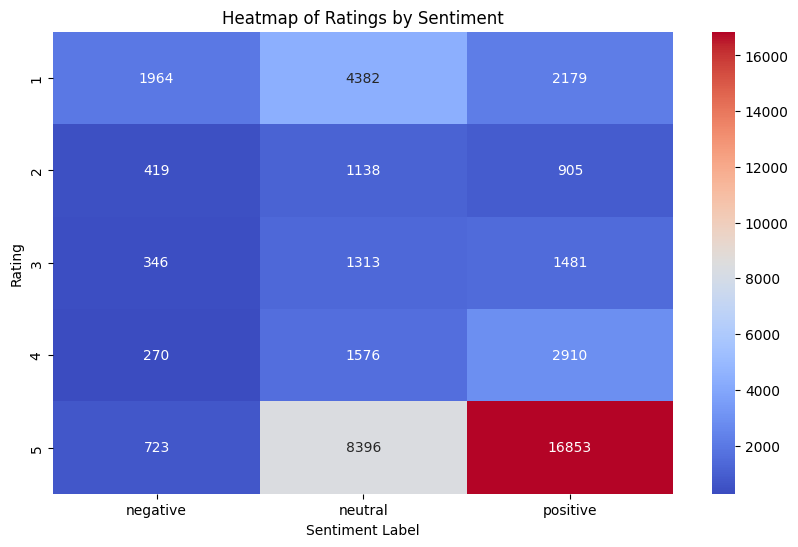

In [30]:
sentiment_rating = pd.crosstab(df['rating'], df['sentiment_label'])

plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_rating, annot=True, fmt="d", cmap='coolwarm')
plt.title('Heatmap of Ratings by Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Rating')
plt.show()

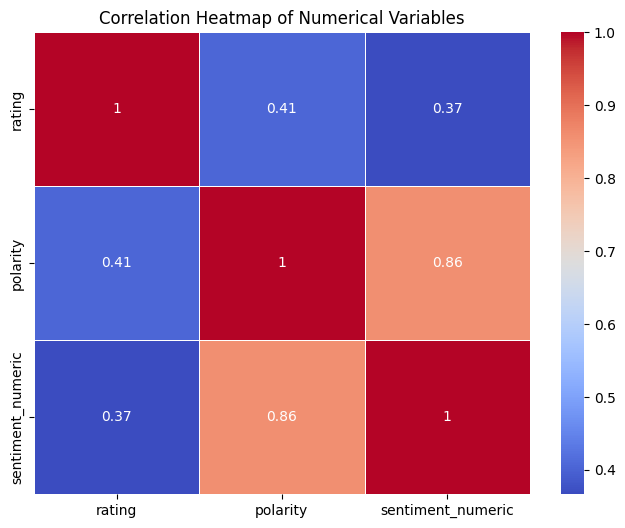

In [34]:
# Map sentiment labels to numeric values
df['sentiment_numeric'] = df['sentiment_label'].map({'negative': -1, 'neutral': 0, 'positive': 1})

# Now you can select numerical columns
numerical_columns = ['rating', 'polarity', 'sentiment_numeric']

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## <font color = 'purple'>Machine Learning Models</font>

<font color = 'purple'>Machine learning models are useful for sentiment analysis in product reviews, because they can autoamtically detect patterns in large amounts of text. Traditional methods often miss nuances like sarcasm or slang, which machine learning models, especially those trained on Natural Language Processing (NLP), can better capture these details. This helps businesses quickly analyse customer feedback, identify trends, and improve products based on insights from thousands of reviews. </font>